# Penjelasan
[Google Colab](https://colab.research.google.com/drive/1pXqF-TZMlo2r5xEg0JU91JBzo7sXsK8Q?usp=sharing)

#### 2. Klasifikasi
Klasifikasi adalah teknik yang digunakan untuk memodelkan hubungan antara variabel independen (fitur) dan variabel dependen (target) dengan tujuan mengklasifikasikan data ke dalam kategori atau label tertentu. Cara kerjanya adalah dengan menemukan pola dalam data yang memungkinkan model untuk memprediksi kategori dari data baru. Teknik ini digunakan untuk menentukan kelas atau kategori dari data, seperti mengidentifikasi email sebagai "spam" atau "bukan spam", atau mengklasifikasikan gambar sebagai "anjing" atau "kucing".

Berikut adalah beberapa algoritma klasifikasi beserta penjelasannya:
- Logistic Regression
> Logistic regression adalah model yang mengubah linear regression menjadi model yang dapat memprediksi nilai kategorikal dengan menggunakan fungsi sigmoid:
> $σ(z) = \frac{1}{1+e^{-x}}$
>
>![logistic-regression](https://gmaaliki.github.io/pelatihan-pupuk-kaltim/img/logistic-regression.png)<br>
> *Sumber: https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-logistic-regression/*
>
> Algoritma ini memberikan sebuah probabilitas antara 0 dan 1, yang kemudian dapat di mapping ke kategori label berdasarkan suatu threshold misalkan 0.5. Apabila probabilitas >0.5, maka model akan memberikan prediksi 1. Sebaliknya apabila probabilitas <0.5, maka model akan memberikan prediksi 0.
>
- SVC (Support Vector Classifier)
> Support Vector Classifier adalah jenis algoritma support vector machine (SVM) yang digunakan untuk klasifikasi. Algoritma ini bertujuan untuk menemukan hyperplane terbaik yang memisahkan 2 daerah keputusan dengan baik. Hyperplane sendiri adalah sebuah fungsi yang digunakan sebagai pemisah antar kelas.
>![svm](https://gmaaliki.github.io/pelatihan-pupuk-kaltim/img/svm.png)<br>
>
> Hyperplane terbaik diperoleh dengan memaksimalkan jarak hyperplane dengan titik data terdekat (support vectors). Fitur-fitur dari data dipetakan ke dalam raung dimensi tinggi menggunakan fungsi kernel. Dengan menggunakan fungsi kernel, akan dihasilkan fitur baru yang akan digunakan untuk klasifikasi. Berikut adalah beberapa fungsi kernel pada algoritma SVM:
> - Kernel Linear: $K(x_i,x_j) = x_i^Tx_j$
> - Kernel Polynomial: $K(x_i,x_j) = (γx_i^Tx_j+r)^d, γ > 0$
> - Kernel Sigmoid: $K(x_i,x_j) = tanh(x_i^Tx_j + r)$
> - Kernel Radial Basis Function: $K(x_i,x_j) = exp(-γ||x_i^T-x_j||^2), γ > 0$
>
> SVC memiliki parameter C yang menentukan seberapa . Nilai C yang tinggi akan membuat model berusaha untuk melakukan fitting kepada data sebaik mungkin. Sedangkan nilai c yang rendah akan lebih mentolerir error dengan tujuan membuat model  yang lebih sederhana. Nilai C yang rendah biasanya baik digunakan pada data yang memiliki banyak noise, sebaliknya nilai C yang tinggi biasanya baik digunakan pada data yang memiliki sedikit noise.
>
>![svm-c](https://gmaaliki.github.io/pelatihan-pupuk-kaltim/img/svm-c.png)<br>
> *Sumber: https://www.learnopencv.com/svm-using-scikit-learn-in-python/*
>
- Decision Tree
> Decision tree bekerja dengan cara membangun sebuah pohon keputusan dari data training. Pohon keputusan akan menghasilkan sebuah *rule* yang digunakan untuk klasifikasi. Berikut adalah struktur dari decision tree:
>
>![d-tree](https://gmaaliki.github.io/pelatihan-pupuk-kaltim/img/dtree.png)<br>
>
> Decision tree menggunakan Gini Index (GI) untuk mengukur kualitas split pada decision tree. GI dapat membantu menentukan split yang paling optimal pada setiap node.
>
> $Gini = 1 - \Sigma_{i=1}^C(p_i)^2$
>
> Hal yang perlu dilakukan dalam pembentukan decision tree adalah pertama-tama hitung GI dari setiap atribut. Misal terdapat data seperti berikut:
>
>![tabel-gini](https://gmaaliki.github.io/pelatihan-pupuk-kaltim/img/tabel-gini.png)<br>
>
> Terdapat 3 atribut yaitu 'Kebutuhan Primer', 'Sudah Gajian', dan 'Harga Barang'. Ketiga atribut tersebut perlu dihitung GI nya. Berikut contoh perhitungan GI untuk atribut 'Sudah Gajian':
>
> Gini Impurity (Beli)
> $=1-(\frac{3}{4})^2-(\frac{1}{4})^2$
> $=0.38$
>
> Gini Impurity (Tidak Beli)
> $=1-(\frac{0}{3})^2-(\frac{3}{3})^2$
> $=0$
>
> Total Gini Impurity
> $(\frac{4}{7}) \times 0.38 + (\frac{3}{7}) \times 0$
> $=0.22$
>
> Lakukan perhitungan tersebut pada atribut lain. Hasilnya adalah:
>
> $GI 'Kebutuhan Primer' = 0.44$
>
> $GI 'Sudah Gajian' = 0.22$
>
> ![gini-barang](https://gmaaliki.github.io/pelatihan-pupuk-kaltim/img/gini-barang.png)<br>
> Nilai paling rendah berada pada threshold 15000, maka dapat disimpulkan untuk split terbaiknya adalah:
> $GI 'Harga Barang < 15000' = 0.34$
>
> Atribut dengan nilai GI terendah terpilih menjadi root. Lalu lakukan langkah tersebut sampai decision tree selesai dibentuk.
> ![tree-akhir](https://gmaaliki.github.io/pelatihan-pupuk-kaltim/img/traa-akhir.png)<br>
- Random Forest Classification
> Sama seperti Random Forest Regression, algoritma ini juga menggunakan konsep random forest yang telah dijelaskan sebelumnya. Bedanya adalah hasil prediksi ditentukan secara majority vote dari setiap tree.
> ![rfc](https://gmaaliki.github.io/pelatihan-pupuk-kaltim/img/random-forest-classification.png)<br>
>
- Gradient Boosting Classification
> Gradient Boosting Classification adalah penerapan Gradient Boosting pada permasalahan klasifikasi. Cara kerjanya hampir sama seperti yang telah dijelaskan sebelumnya, bedanya untuk klasifikasi algoritma menggunakan loss function seperti cross-entropy untuk mengukur probabilitas.

Setelah model ditraining, diperlukan adanya metode evaluasi untuk menentukan baiknya performa model. Sebelum itu, terdapat beberapa istilah yang harus diketahui mengenai evaluasi model klasifikasi:
- True Positive (TP): Jumlah klasifikasi positif yang telah diprediksi positif oleh model
- False Positive (FP): Jumlah klasifikasi negatif yang telah diprediksi positif oleh model
- True Negative (TN): Jumlah klasifikasi negatif yang telah diprediksi negatif oleh model
- False Negative (FN): Jumlah klasifikasi positif yang telah diprediksi negatif oleh model

Berikut adalah metrik evaluasi yang dapat digunakan untuk regresi beserta penjelasannya:
- Akurasi
> Akurasi adalah rasio prediksi yang benar dibanding jumlah populasi. Nilai akurasi yang tinggi mengindikasi bahwa sebagian besar prediksi model benar, sedangkan apabila nilai akurasi rendah maka mengindikasi bahwa model memiliki banyak prediksi salah.
> $Akurasi = \frac{TP + TN}{TP + TN + FP + FN}$
- Presisi
> Presisi adalah rasio dari data TP yang diprediksi sebagai positif oleh model. Dalam kata lain, presisi adalah akurasi dari prediksi positif.
> $Presisi = \frac{TP}{TP + FP}$
- Recall
> Recall adalah rasio dari data positif yang diprediksi dengan benar. Dalam kata lain, recall menggambarkan kemampuan model dalam memprediksi data positif.
> $Recall = \frac{TP}{TP + FN}$
- F1 Score
> F1 score menggabungkan presisi dan recall untuk mendapatkan kesimpulan menyeluruh terkait dengan performa model. Metrik ini mengukur rata-rata harmonis dari presisi dan recall.
> $F1score = 2 \times \frac{presisi \times recall}{presisi + recall}$
- Confusion Matrix
> Confusion matrix adalah visualisasi dari performa model. Dibuat dalam bentuk tabel agar dapat lebih jelas terlihat dimana letak kesalahan model.


# Implementasi

Berikut adalah implementasi regresi dengan menerapkan CRISP-DM

#### Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder

sns.set_style("whitegrid")

#### Business Understanding

Sebuah pabrik memiliki banyak mesin yang bekerja setiap harinya. Setelah beberapa lama, mesin-mesin tersebut makin berumur sehingga rawan kerusakan. Oleh karena itu untuk mempertahankan produksi, pihak manajemen pabrik memutuskan untuk melakukan maintenance pada jadwal tertentu.

Masalahnya dengan maintenance terjadwal adalah mesin bisa saja mengalami failure sebelum waktu maintenance atau mesin bisa juga mendapatkan maintenance sebelum benar benar membutuhkannya. Keduanya tentu akan menambah biaya. Jadi perusahaan memutuskan untuk membuat sebuah sistem yang dapat memprediksi kapan mesin akan mengalami failure sehingga maintenance dapat berjalan secara lebih efisien.

[link dataset](https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification)

#### Data Understanding

Sebelum melatih model, kita perlu memahami data terlebih dahulu. Berikut adalah data yang akan kita gunakan.

In [ ]:
df = pd.read_csv(
    "https://gmaaliki.github.io/dataset/predictive_maintenance.csv")

df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


Dari tabel diatas, dapat dilihat bahwa data yang dimiliki oleh perusahaan terdiri dari 10 fitur yaitu:
- UDI (id unik 1-10000)
- productID (id produk)
- Type (kualitas produk; L=low, M=medium, H=high)
- Air temperature [K])
- Process temperature [K]
- Rotational speed [rpm]
- Torque [Nm]
- Tool wear [min]
- Target (variabel target)
- Failure Type (variabel target)

Dataset memiliki 2 variabel target. Untuk sekarang, kita hanya perlu memprediksi apakah mesin tersebut akan mengalami failure atau tidak, jadi kita dapat drop kolom `Failure Type`.

In [ ]:
df.drop(['Failure Type'], axis=1, inplace=True)

In [ ]:
df.nunique()

,0
UDI,10000
Product ID,10000
Type,3
Air temperature [K],93
Process temperature [K],82
Rotational speed [rpm],941
Torque [Nm],577
Tool wear [min],246
Target,2


Fitur `UDI` dan `productID` dapat di drop karena semua valuenya unik sehingga tidak akan berpengaruh kepada prediksi model

In [ ]:
df.drop(['UDI', 'Product ID'], axis=1, inplace=True)

Kita dapat melihat informasi mengenai dataset dengan menggunakan `df.info()`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


In [ ]:
df.shape

(10000, 7)

Untuk mengetahui jumlah data yang memiliki `null` value, dapat menggunakan `df.isnull().sum()`. Apabila terdapat data yang mempunyai nilai `null`, maka perlu dihandle pada tahap data preparation. Dalam kasus ini tidak perlu karena tidak ada `null` value.

In [ ]:
df.isnull().sum()

,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0


Dengan menggunakan `df.describe()`, dapat ditampilkan nilai statistik dataset seperti standar deviasi dan kuartil.

In [ ]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


Distribusi data dapat diketahui dengan menggunakan histogram. Pada histogram terdapat parameter `bins` yang dapat disesuaikan agar distribusi dapat lebih terlihat. Terdapat berbagai cara yang dapat dilakukan untuk menemukan jumlah `bins` optimal yang dapat dilihat pada [halaman ini](https://how2matplotlib.com/bin-size-in-matplotlib-histogram.html).

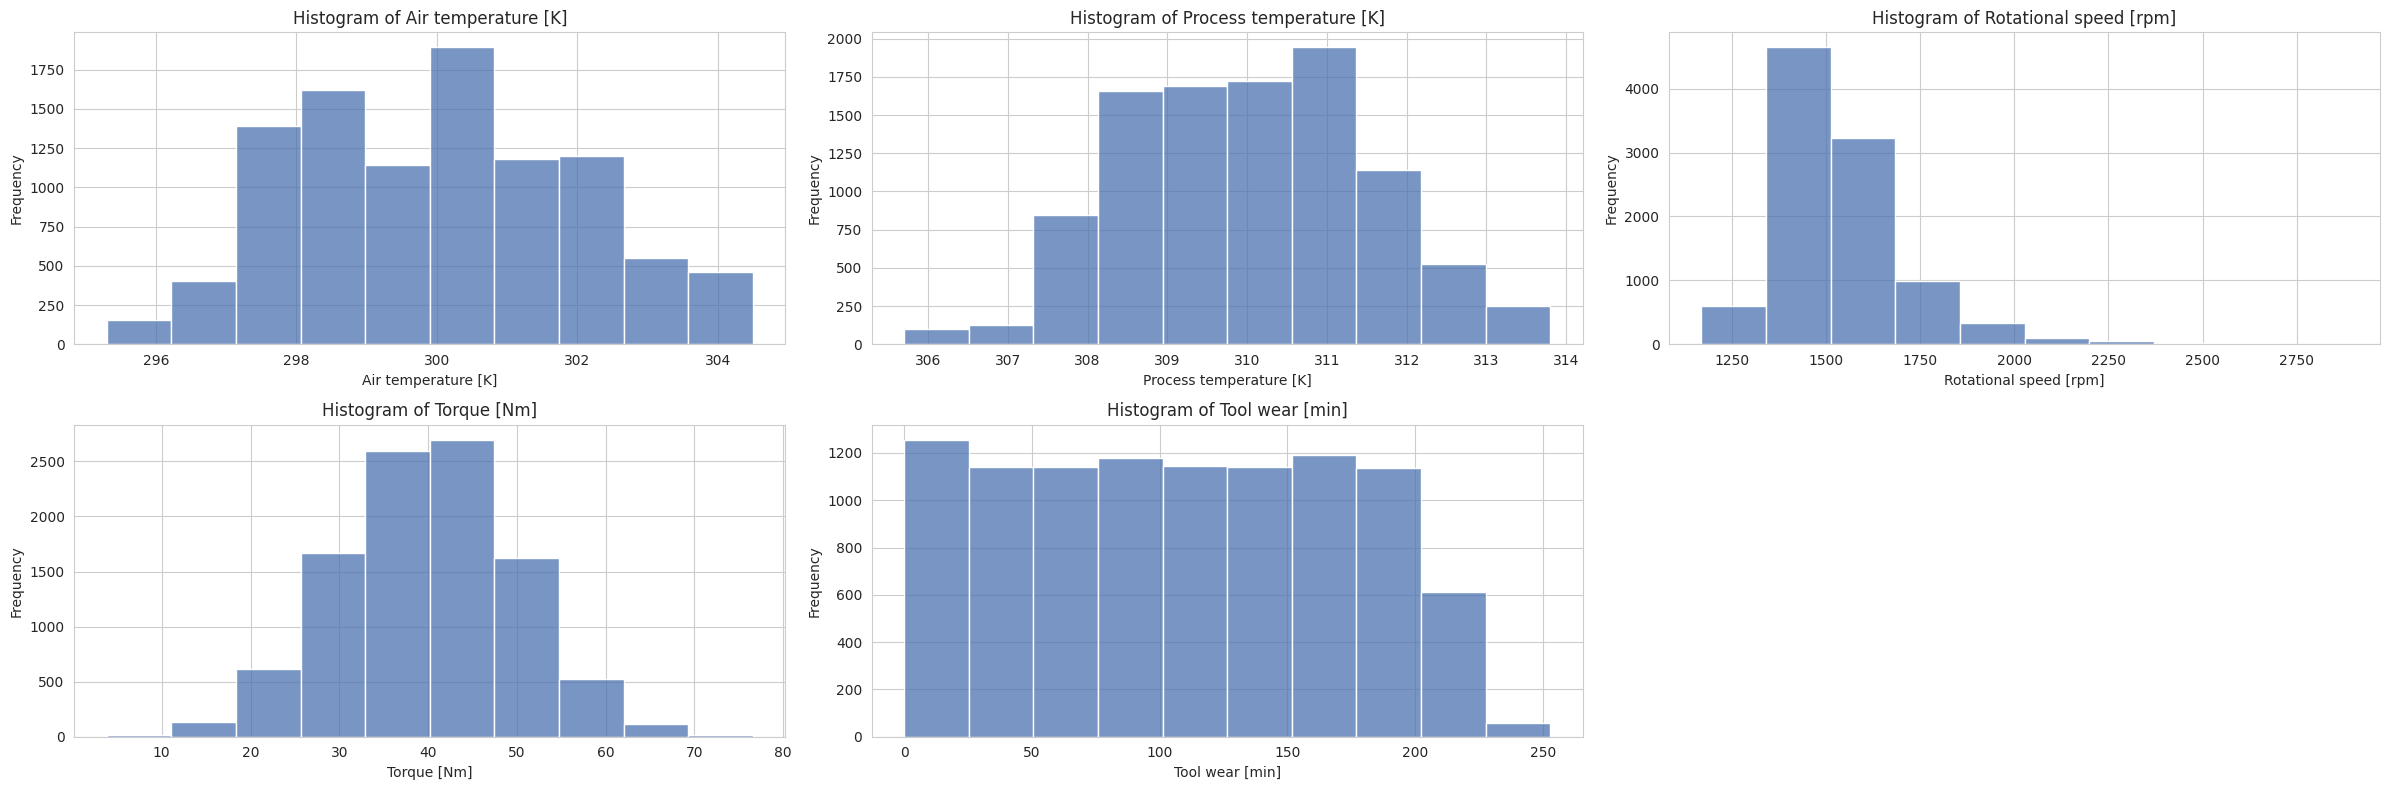

In [ ]:
features_to_plot = [
    "Air temperature [K]",
    "Process temperature [K]",
    "Rotational speed [rpm]",
    "Torque [Nm]",
    "Tool wear [min]",
]
num_features = len(features_to_plot)


ncols = 3
nrows = math.ceil(num_features / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         figsize=(8 * ncols, 4 * nrows))

axes = axes.flatten()

for i, column in enumerate(features_to_plot):
    sns.histplot(df[column], bins=10, ax=axes[i], kde=False)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Delete empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Sebagian fitur memiliki distribusi normal yang berarti lebih bagus untuk menggunakan model yang linear. Apabila kita perlu melakukan normalisasi, metode `StandardScaler` sangat cocok digunakan pada data yang berdistribusi normal.

Untuk mendapatkan generalisasi yang baik, distribusi data yang kita miliki harus sesuai dengan keadaan di dunia nyata. Maka dari itu, dataset perlu di crosscheck dengan ilmu dari domain permasalahan.

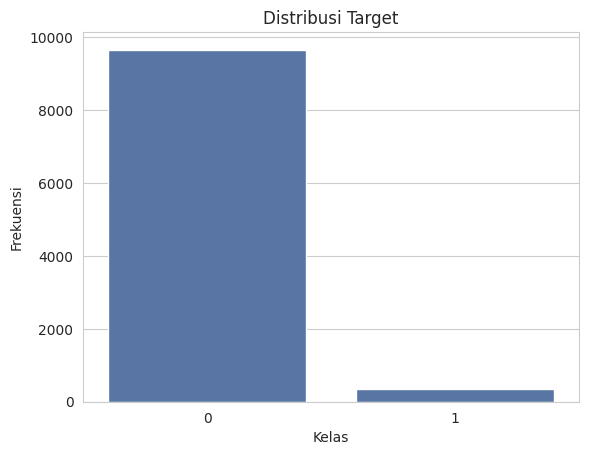

In [ ]:
sns.countplot(x='Target', data=df)
sns.set_palette('deep')
plt.title('Distribusi Target')
plt.xlabel('Kelas')
plt.ylabel('Frekuensi')
plt.show()

Seperti yang dapat dilihat diatas, dataset bersifat imbalance. Seringkali data yang tidak seimbang dapat memberikan bias kepada model serta membuat model kesulitan dalam melakukan generalisasi. Cara mengatasi data yang imbalance dapat pelajari pada [artikel](https://www.turintech.ai/what-is-imbalanced-data-and-how-to-handle-it) ini.

#### Data Preparation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


Terdapat fitur `Type` yang merupakan tipe data kategorikal. Hal pertama yang harus dilakukan adalah melakukan encoding terhadap fitur tersebut. Karena kategori dari type adalah berdasarkan peringkat (L < M < H). Maka encoding yang dilakukan juga harus mencerimankan peringkat itu.

$L = 0, M = 1, H = 2$


Dengan begitu, informasi pada fitur masih tetap dipertahankan.

In [ ]:
categories = [['L', 'M', 'H']]

encoder = OrdinalEncoder(categories=categories)
encoded_data = encoder.fit_transform(df[['Type']])
df['Type'] = encoded_data

Untuk menyeragamkan nilai pada data, pada percobaan ini akan melakukan normalisasi data. Percobaan ini akan menggunakan 3 metode yaitu:
1. Tanpa normalisasi
2. Menggunakan standard scaler
3. Menggunakan min max scaler

In [ ]:
# Tanpa normalisasi
df_train_no_norm = df.copy()

# Menggunakan standard scaler
standard_scaler = StandardScaler()
df_train_standard = df.copy()
df_train_standard = pd.DataFrame(
    standard_scaler.fit_transform(df), columns=df.columns)

# Menggunakan min max scaler
min_max_scaler = MinMaxScaler()
df_train_minmax = df.copy()
df_train_minmax = pd.DataFrame(
    min_max_scaler.fit_transform(df), columns=df.columns)

#### Modelling

##### Menggunakan Data Tanpa Normalisasi

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(df_train_no_norm.drop(
    'Target', axis=1), df['Target'], test_size=0.2, random_state=1)

Untuk menyimpan hasil evaluasi setelah training model, dibuat sebuah array `results`.

In [ ]:
results_no_norm = []

###### Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Logistic Regression',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_no_norm.append(res)

###### Support Vector Classifier (SVC)

In [ ]:
model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Support Vector Classifier',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_no_norm.append(res)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### Decision Tree

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Support Vector Classifier',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_no_norm.append(res)

###### Random Forest

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Random Forest Classifier',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_no_norm.append(res)

###### Gradient Boosting Classifier

In [ ]:
model = GradientBoostingClassifier(n_estimators=100)
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Gradient Boosting Classifier',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_no_norm.append(res)

##### Menggunakan Data Dengan Standard Scaler

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(df_train_standard.drop(
    'Target', axis=1), df['Target'], test_size=0.2, random_state=1)

Untuk menyimpan hasil evaluasi setelah training model, dibuat sebuah array `results`.

In [ ]:
results_standard = []

###### Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Logistic Regression',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_standard.append(res)

###### Support Vector Classifier (SVC)

In [ ]:
model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Support Vector Classifier',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_standard.append(res)

###### Decision Tree

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Support Vector Classifier',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_standard.append(res)

###### Random Forest

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Random Forest Classifier',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_standard.append(res)

###### Gradient Boosting Classifier

In [ ]:
model = GradientBoostingClassifier(n_estimators=100)
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Gradient Boosting Classifier',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_standard.append(res)

##### Menggunakan Data Dengan Min Max Scaler

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(df_train_minmax.drop(
    'Target', axis=1), df['Target'], test_size=0.2, random_state=1)

Untuk menyimpan hasil evaluasi setelah training model, dibuat sebuah array `results`.

In [ ]:
results_minmax = []

###### Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Logistic Regression',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_minmax.append(res)

###### Support Vector Classifier (SVC)

In [ ]:
model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Support Vector Classifier',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_minmax.append(res)

###### Decision Tree

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Support Vector Classifier',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_minmax.append(res)

###### Random Forest

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Random Forest Classifier',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_minmax.append(res)

###### Gradient Boosting Classifier

In [ ]:
model = GradientBoostingClassifier(n_estimators=100)
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Gradient Boosting Classifier',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_minmax.append(res)

#### Evaluation

Hasil evaluasi menggunakan data tanpa normalisasi

In [ ]:
for res in results_no_norm:
    print(f"{res['model']}")
    print(f"Accuracy: {res['accuracy']}")
    print(f"Precision: {res['precision']}")
    print(f"Recall: {res['recall']}")
    print(f"F1 Score: {res['f1_score']}")
    print("")

Logistic Regression
Accuracy: 0.9735
Precision: 0.7777777777777778
Recall: 0.2222222222222222
F1 Score: 0.345679012345679

Support Vector Classifier
Accuracy: 0.9685
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Support Vector Classifier
Accuracy: 0.9765
Precision: 0.6081081081081081
Recall: 0.7142857142857143
F1 Score: 0.6569343065693432

Random Forest Classifier
Accuracy: 0.9915
Precision: 0.9791666666666666
Recall: 0.746031746031746
F1 Score: 0.846846846846847

Gradient Boosting Classifier
Accuracy: 0.987
Precision: 0.9302325581395349
Recall: 0.6349206349206349
F1 Score: 0.7547169811320754



Hasil evaluasi menggunakan data dengan standard scaler

In [ ]:
for res in results_standard:
    print(f"{res['model']}")
    print(f"Accuracy: {res['accuracy']}")
    print(f"Precision: {res['precision']}")
    print(f"Recall: {res['recall']}")
    print(f"F1 Score: {res['f1_score']}")
    print("")

Logistic Regression
Accuracy: 0.973
Precision: 0.7647058823529411
Recall: 0.20634920634920634
F1 Score: 0.32499999999999996

Support Vector Classifier
Accuracy: 0.9775
Precision: 1.0
Recall: 0.2857142857142857
F1 Score: 0.4444444444444445

Support Vector Classifier
Accuracy: 0.9775
Precision: 0.625
Recall: 0.7142857142857143
F1 Score: 0.6666666666666666

Random Forest Classifier
Accuracy: 0.988
Precision: 0.9333333333333333
Recall: 0.6666666666666666
F1 Score: 0.7777777777777778

Gradient Boosting Classifier
Accuracy: 0.987
Precision: 0.9512195121951219
Recall: 0.6190476190476191
F1 Score: 0.7500000000000001



Hasil evaluasi menggunakan data dengan min max scaler

In [ ]:
for res in results_minmax:
    print(f"{res['model']}")
    print(f"Accuracy: {res['accuracy']}")
    print(f"Precision: {res['precision']}")
    print(f"Recall: {res['recall']}")
    print(f"F1 Score: {res['f1_score']}")
    print("")

Logistic Regression
Accuracy: 0.969
Precision: 1.0
Recall: 0.015873015873015872
F1 Score: 0.03125

Support Vector Classifier
Accuracy: 0.972
Precision: 1.0
Recall: 0.1111111111111111
F1 Score: 0.19999999999999998

Support Vector Classifier
Accuracy: 0.9775
Precision: 0.625
Recall: 0.7142857142857143
F1 Score: 0.6666666666666666

Random Forest Classifier
Accuracy: 0.9895
Precision: 0.9565217391304348
Recall: 0.6984126984126984
F1 Score: 0.8073394495412843

Gradient Boosting Classifier
Accuracy: 0.987
Precision: 0.9512195121951219
Recall: 0.6190476190476191
F1 Score: 0.7500000000000001



Untuk mengukur performa model pada permasalahan ini, lebih cocok untuk melihat F1 score dibanding dengan akurasi karena datanya yang bersifat imbalance. Apabila kita nilai berdasarkan F1 score, dapat dilihat bahwa algoritma random forest classifier cenderung memiliki hasil yang lebih baik. Khususnya pada data yang diterapkan min max scaler, algoritma random forest memiliki hasil terbaik dengan F1 score 0.8148148148148148.

#### Feature Selection

Kita dapat mengembangkan lagi modelnya dengan melakukan feature selection. Dengan mengurangi fitur yang tidak penting, model dapat lebih berfokus kepada fitur yang paling berpengaruh terhadap keputusan dan harapannya akan menghasilkan model yang lebih baik. Untuk penjelasan lebih lengkap mengenai feature selection dapat dilihat pada [halaman ini](https://www.stratascratch.com/blog/feature-selection-techniques-in-machine-learning/).

Metode yang akan dipakai kali ini adalah menggunakan random forest importance untuk menentukan peringkat dari kepentingan fitur pada model.

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    df.drop('Target', axis=1), df['Target'], test_size=0.2, random_state=1)

model = RandomForestClassifier(n_estimators=100, random_state=1)

model.fit(x_train, y_train)


importance = model.feature_importances_

indices = np.argsort(importance)[::-1]


features = [

    'Type',

    'Air temperature [K]',

    'Process temperature [K]',

    'Rotational speed [rpm]',

    'Torque [Nm]',

    'Tool wear [min]',
]


print("Peringkat Feature Importance:")

for f in range(x_train.shape[1]):

    print(f"{f + 1}. {features[f]} ({importance[indices[f]]})")

Peringkat Feature Importance:
1. Type (0.308099637200635)
2. Air temperature [K] (0.2175388511833149)
3. Process temperature [K] (0.17303833684109185)
4. Rotational speed [rpm] (0.1408823152363742)
5. Torque [Nm] (0.1369387888415258)
6. Tool wear [min] (0.023502070697058272)


Dapat dilihat bahwa fitur `Tool wear [min]` memiliki nilai importance yang rendah. Fitur tersebut dapat di drop karena memilki nilai importance yang cukup rendah. Kemudian kita lihat korelasi heatmapnya.

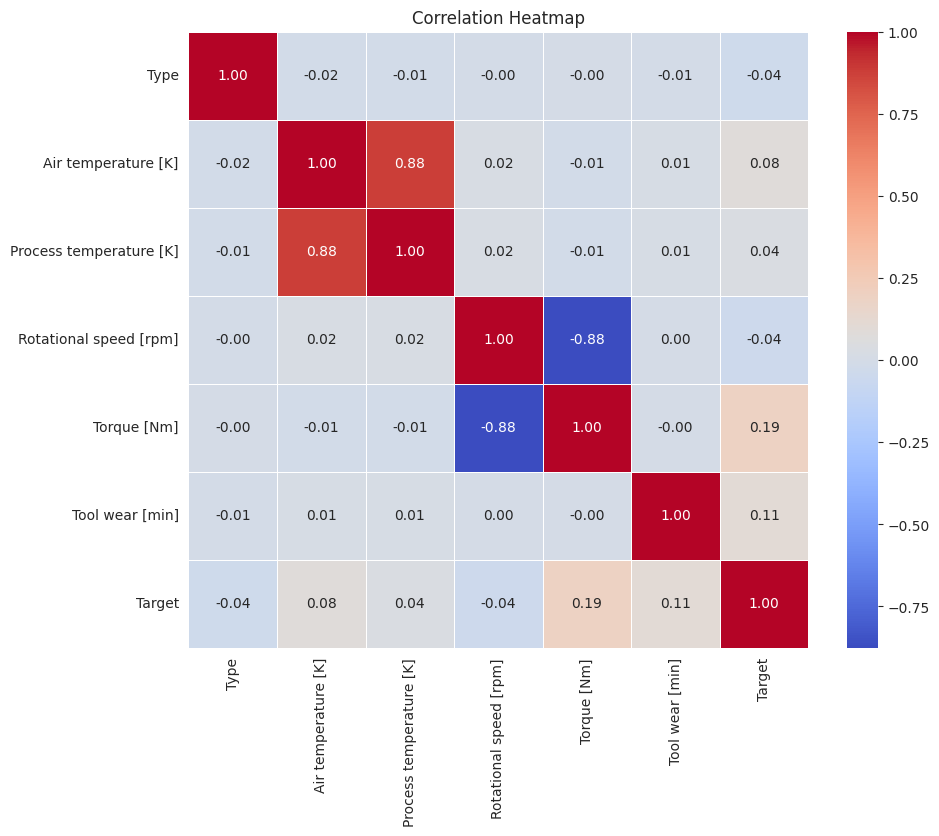

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
            fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Disini ada beberapa hubungan antar fitur yang memiliki korelasi tinggi. Yaitu `Air temperature [K]` dan `Process temperature [K]` serta `Torque [min]` dan `Rotational speed [rpm]`. Hal ini dapat berarti bahwa pasangan fitur tersebut memiliki redundansi. Oleh karena itu, kita dapat mencoba drop fitur yang redundan tersebut.

#### Remodelling

Dari statement diatas, kita bisa ber eksperimen dengan melakukan drop fitur untuk mendapatkan hasil yang lebih baik.

In [ ]:
features_to_drop = [
    # 'Process temperature [K]',
    # 'Torque [Nm]',
    'Tool wear [min]',
]

df.drop(features_to_drop, axis=1, inplace=True)

In [ ]:
# Tanpa normalisasi
df_train_no_norm = df.copy()

# Menggunakan standard scaler
standard_scaler = StandardScaler()
df_train_standard = df.copy()
df_train_standard = pd.DataFrame(
    standard_scaler.fit_transform(df), columns=df.columns)

# Menggunakan min max scaler
min_max_scaler = MinMaxScaler()
df_train_minmax = df.copy()
df_train_minmax = pd.DataFrame(
    min_max_scaler.fit_transform(df), columns=df.columns)

##### Menggunakan Data Tanpa Normalisasi

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(df_train_no_norm.drop(
    'Target', axis=1), df['Target'], test_size=0.2, random_state=1)

Untuk menyimpan hasil evaluasi setelah training model, dibuat sebuah array `results`.

In [ ]:
results_no_norm = []

###### Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Logistic Regression',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_no_norm.append(res)

###### Support Vector Classifier (SVC)

In [ ]:
model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Support Vector Classifier',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_no_norm.append(res)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### Decision Tree

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Support Vector Classifier',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_no_norm.append(res)

###### Random Forest

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Random Forest Classifier',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_no_norm.append(res)

###### Gradient Boosting Classifier

In [ ]:
model = GradientBoostingClassifier(n_estimators=100)
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Gradient Boosting Classifier',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_no_norm.append(res)

##### Menggunakan Data Dengan Standard Scaler

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(df_train_standard.drop(
    'Target', axis=1), df['Target'], test_size=0.2, random_state=1)

Untuk menyimpan hasil evaluasi setelah training model, dibuat sebuah array `results`.

In [ ]:
results_standard = []

###### Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Logistic Regression',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_standard.append(res)

###### Support Vector Classifier (SVC)

In [ ]:
model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Support Vector Classifier',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_standard.append(res)

###### Decision Tree

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Support Vector Classifier',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_standard.append(res)

###### Random Forest

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Random Forest Classifier',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_standard.append(res)

###### Gradient Boosting Classifier

In [ ]:
model = GradientBoostingClassifier(n_estimators=100)
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Gradient Boosting Classifier',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_standard.append(res)

##### Menggunakan Data Dengan Min Max Scaler

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(df_train_minmax.drop(
    'Target', axis=1), df['Target'], test_size=0.2, random_state=1)

Untuk menyimpan hasil evaluasi setelah training model, dibuat sebuah array `results`.

In [ ]:
results_minmax = []

###### Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Logistic Regression',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_minmax.append(res)

###### Support Vector Classifier (SVC)

In [ ]:
model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Support Vector Classifier',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_minmax.append(res)

###### Decision Tree

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Support Vector Classifier',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_minmax.append(res)

###### Random Forest

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Random Forest Classifier',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_minmax.append(res)

###### Gradient Boosting Classifier

In [ ]:
model = GradientBoostingClassifier(n_estimators=100)
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

res = {
    'model': 'Gradient Boosting Classifier',
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}

results_minmax.append(res)

#### Re-evaluation

Hasil evaluasi menggunakan data tanpa normalisasi

In [ ]:
for res in results_no_norm:
    print(f"{res['model']}")
    print(f"Accuracy: {res['accuracy']}")
    print(f"Precision: {res['precision']}")
    print(f"Recall: {res['recall']}")
    print(f"F1 Score: {res['f1_score']}")
    print("")

Logistic Regression
Accuracy: 0.9745
Precision: 0.8333333333333334
Recall: 0.23809523809523808
F1 Score: 0.37037037037037035

Support Vector Classifier
Accuracy: 0.9685
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Support Vector Classifier
Accuracy: 0.9655
Precision: 0.4642857142857143
Recall: 0.6190476190476191
F1 Score: 0.5306122448979592

Random Forest Classifier
Accuracy: 0.9855
Precision: 0.9047619047619048
Recall: 0.6031746031746031
F1 Score: 0.7238095238095238

Gradient Boosting Classifier
Accuracy: 0.9835
Precision: 0.8409090909090909
Recall: 0.5873015873015873
F1 Score: 0.6915887850467289



Hasil evaluasi menggunakan data dengan standard scaler

In [ ]:
for res in results_standard:
    print(f"{res['model']}")
    print(f"Accuracy: {res['accuracy']}")
    print(f"Precision: {res['precision']}")
    print(f"Recall: {res['recall']}")
    print(f"F1 Score: {res['f1_score']}")
    print("")

Logistic Regression
Accuracy: 0.976
Precision: 0.8571428571428571
Recall: 0.2857142857142857
F1 Score: 0.42857142857142855

Support Vector Classifier
Accuracy: 0.9765
Precision: 1.0
Recall: 0.25396825396825395
F1 Score: 0.4050632911392405

Support Vector Classifier
Accuracy: 0.9645
Precision: 0.45121951219512196
Recall: 0.5873015873015873
F1 Score: 0.5103448275862069

Random Forest Classifier
Accuracy: 0.986
Precision: 0.926829268292683
Recall: 0.6031746031746031
F1 Score: 0.7307692307692307

Gradient Boosting Classifier
Accuracy: 0.984
Precision: 0.8604651162790697
Recall: 0.5873015873015873
F1 Score: 0.6981132075471699



Hasil evaluasi menggunakan data dengan min max scaler

In [ ]:
for res in results_minmax:
    print(f"{res['model']}")
    print(f"Accuracy: {res['accuracy']}")
    print(f"Precision: {res['precision']}")
    print(f"Recall: {res['recall']}")
    print(f"F1 Score: {res['f1_score']}")
    print("")

Logistic Regression
Accuracy: 0.969
Precision: 1.0
Recall: 0.015873015873015872
F1 Score: 0.03125

Support Vector Classifier
Accuracy: 0.97
Precision: 1.0
Recall: 0.047619047619047616
F1 Score: 0.0909090909090909

Support Vector Classifier
Accuracy: 0.9635
Precision: 0.4444444444444444
Recall: 0.6349206349206349
F1 Score: 0.5228758169934641

Random Forest Classifier
Accuracy: 0.9865
Precision: 0.9285714285714286
Recall: 0.6190476190476191
F1 Score: 0.742857142857143

Gradient Boosting Classifier
Accuracy: 0.983
Precision: 0.8222222222222222
Recall: 0.5873015873015873
F1 Score: 0.6851851851851852



Untuk mendapatkan hasil yang lebih baik, kita dapat melakukan eksperimen dengan mengganti-ganti data yang digunakan.